<a href="https://colab.research.google.com/github/Ankit-LASA/Data-Science/blob/main/Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
!pip install preliz

In [104]:
import preliz as pz

In [105]:
!pip install pymc-bart

In [106]:
import pymc_bart as pmb

In [107]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how many calories you burn in a day, using time you spent exercising that day (in minutes) as a predictor.

To help you understand what you're doing with this tree, seperately create an x/y plot with time exercising as x, and calories burned as y.

If this seems to easy, then add another variable or two (type of exercise?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

I completed the decision tree, but since I've been out sick, I haven't had the opportunity to show it to you :(

**Task2**:

What is a decision tree? How do they work?

A decision tree is a flow chart used to represent and analyze possible outcomes in a given situtation.

They start with a singular 'parent' node (the original root node) that branches off to one or more 'children' nodes further down. Any given node can only have one 'parent', but they may have numerous 'children' nodes. The endpoints are called 'leaf' nodes because they have no 'children'.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The 'depth' of a decision tree represents the total amount of nodes between the original 'root' node to the very last 'leaf' node. It demonstrates the total complexity of the model by showing what patterns it can capture. Generally, lower depths indicate underfitting, while higher depths indicate overfitting.

You determine whether a tree has an accurate depth by using the prior and your data. If you have a weak prior and a small amount of data, then a lower depth would likely better capture the model. Additionally, if a given decision doesn't add much to your model, that would indicate that there's excessive depth and that certain branches could be removed.

**Task4:**

How are BART models similar and different from a decision tree?

BART models are similar to a decision tree because it bases its model off numerous randomly altered decision trees that model possible trends in the data.

BART models are different from a decision tree because they use numerous decision trees to create a final model and have corrective checks such as boosting, regularizing priors, or MCMC to prevent under- and overfitting models. By randomizing the data, it's able to pick up on alternate trends without adding too much complexity.

**Task5**:

Why would we use a BART model instead of a decision tree?

You would use a BART model instead of a decision tree to better balance over- and underfitting in models with a more flexible and robust decisionmaking strategy. Because decision trees are static and fixed, they are extremely prone to overfitting the data. However, BART models correct for such flaws (as explained above) with boosting to accurately model a litany of potential trends. All of the above concerns are magnified with a highly uncertain or weak prior that could potentially hold a litany of different trends.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [108]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [109]:
#taking a look at the data
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


(array([14., 42., 69., 52., 41., 39., 27., 27., 16.,  6.]),
 array([2.7 , 3.06, 3.42, 3.78, 4.14, 4.5 , 4.86, 5.22, 5.58, 5.94, 6.3 ]),
 <BarContainer object of 10 artists>)

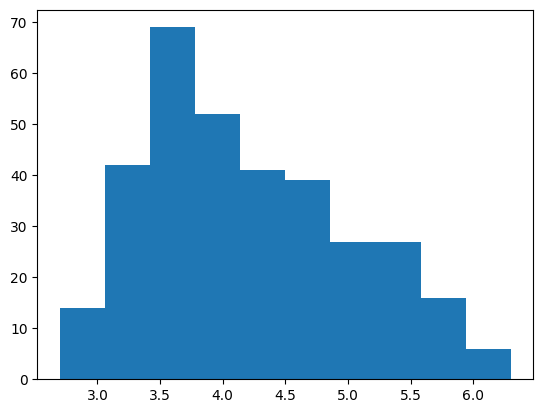

In [110]:
#as you noted, this looks like a normal-ish distribution (which will be important for the later coding)
plt.hist(penguins.body_mass)

In [111]:
#cutting out incomplete data [if there is any]
penguins_nona = penguins.dropna()

In [112]:
#features = ["bill_length", "bill_depth", "flipper_length"]
#need to combine multiple into one
X = penguins_nona[['bill_length', 'bill_depth', 'flipper_length']]
#copy from code
Y = penguins_nona['body_mass'].to_numpy()

In [113]:
#this is mostly just copied from the code, but the likelihood is changed
#the reason why I'm using normal was done above on the histogram
with pm.Model() as model_BART:
    s = pm.HalfNormal('s',20) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y) #likelihood
    idata_BART = pm.sample(compute_convergence_checks=False)

Output()

In [114]:
#copy
pm.sample_posterior_predictive(idata_BART,model_BART, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

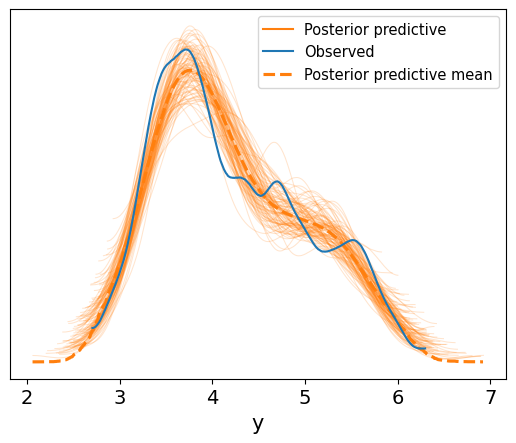

In [115]:
ax = az.plot_ppc(idata_BART, num_pp_samples=100, colors=["C1", "C0", "C1"])

The PPC shows a relatively close, tight fit. All things being equal, the models loks pretty good!

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

<Axes: xlabel='flipper_length', ylabel='body_mass'>

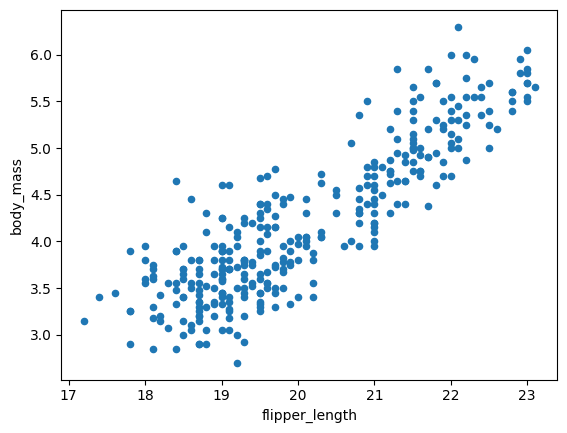

In [116]:
#setting up the scatterplot
penguins_nona.plot(y = 'body_mass', x = 'flipper_length', kind = "scatter")

In [117]:
#all of this is practically copied
posterior_mean = idata_BART.posterior["μ"]

μ_hdi = az.hdi(ary=idata_BART, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_BART, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


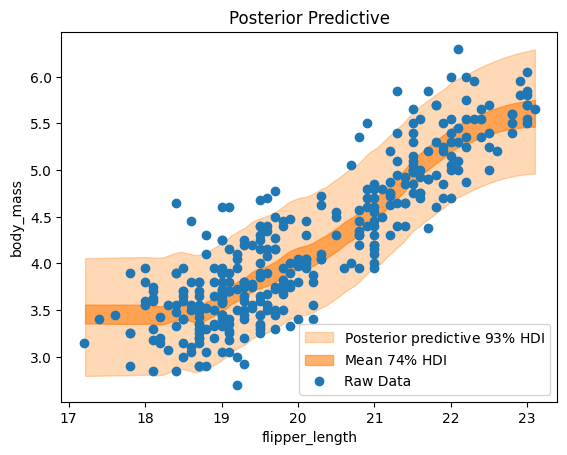

In [118]:
idx = np.argsort(X.to_numpy()[:, 2]) #grab fifth row
fig, ax = plt.subplots()

az.plot_hdi(
    x=X.to_numpy()[:, 2],#grab fifth row
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=X.to_numpy()[:, 2],#grab fifth row
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(penguins_nona['flipper_length'], penguins_nona["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

In context, the plot seems to be slightly distorted but accurate. The posterior predictive generally captures the trend of the raw data, but there is a lot more variance in certain parts of the graph (like from X = 18 --> X = 20).

Judging off prior knowledge, it seems to capture the general trend. The lowest flipper lengths have the smallest mass as it means those penguins have a smaller size than others and it linearly increases until the mass balances off at the peak length at the end. However, there seems to be confounding variables that could likely be influencing the data. Factors such as age and sex certainly influence weight, so the variance in the data could be better captured by other models. For example, some penguins have a much larger body mass than their flipper length counterparts and fall outside the 93% HDI range. That could be explained by certain sexes having a higher body mass to flipper length ratio.

The assoiation is certainly there, but we don't know if it's the strongest or that it captures the most important trends in the data

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

In [ ]:
#for these, I just copied from the code. Nothing special yet

array([<Axes: xlabel='bill_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='flipper_length'>], dtype=object)

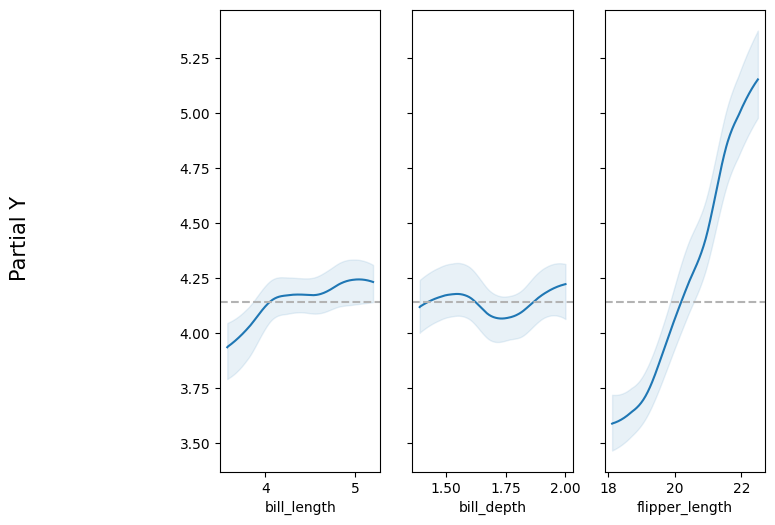

In [119]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='bill_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='flipper_length'>], dtype=object)

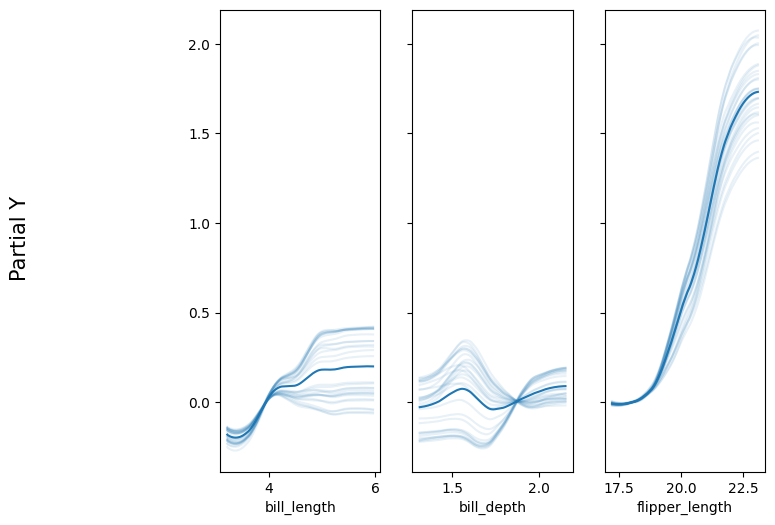

In [120]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In [121]:
vi_BART = pmb.compute_variable_importance(idata_BART, μ_, X)

<Axes: ylabel='R²'>

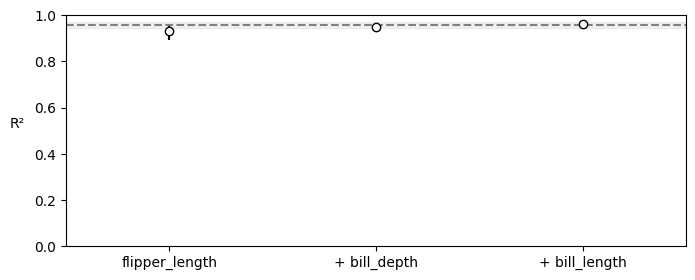

In [122]:
pmb.plot_variable_importance(vi_BART)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

Using the above plots, flipper length seems to be the most important in predicting body mass in penguins. The PDPS shows a strong linear correlation which is further supported by the ICE and VI models.

Each variable demonstrates a different relationship to the body mass. As explained above, flipper length looks linear. However, bill length shows a linear trend and flattens out at the end and bill depth doesn't seem to show a correlation at all as the ICE graph shows both increasing and decreasing trends along certain parts of the model. Nevertheless, by judging the R^2 values, flipper_length provides the greatest boost in performance such that the added accuracy from bill depth and bill length isn't significant. That means it's comparatively simpler to cut off those values to reduce complexity.

I doubt that it's extremely complicated by interactions with other variables. The ICE plot shows that both bill length and bill depth have an extremely high level of variance at higher levels which indicates they rely on other variables. Bill length has a slight amount of uncertainty at the beginning, but bill depth has a severe amount of variance. However, flipper length holds a remarkably tight correlation to body mass for the first 3/4ths of the graph, with the last quarter having some variance. To put it differently: flipper length has a **much** stronger correlation with the data for the first three quarters of the data, and it's equally as variable for the last quarter (compared with the other variables), so there doesn't seem to be a point in using them to interact with one another. This makes sense intuitively; bill length and depth seem to be indicative of a species, not how long the flippers are.

